# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [1]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Описание данных

In [2]:
df = pd.read_csv('telecom_users.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Посмотрим на соотношение продлившивших контракт и непродливших.

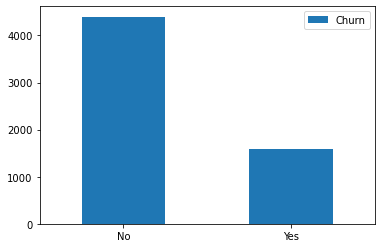

In [3]:
churn_df = pd.DataFrame(df['Churn'].value_counts())
ax = churn_df.plot.bar(rot=0)

Заметим, что количество целевых значений не сбалансировано. Будем использовать кросс-валидацию для разделения данных на тестувую и обучающую выборки.

### Преобразование категориальных признаков призаков

<br>
Отбросим неинформативные признаки в колонках:<br>

&nbsp;&nbsp;&nbsp;&nbsp; `Unnamed: 0` <br>
&nbsp;&nbsp;&nbsp;&nbsp; `customerID` <br>

In [4]:
# Feature selection
drop_elements = ['Unnamed: 0', 'customerID']
df = df.drop(drop_elements, axis = 1)

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ','0', regex=True).astype(float)

Посмотрим на уникальные значения категориальных признаков и их количество.

In [6]:
for column in df.columns:
    if df[column].dtype != 'int64' and df[column].dtype != 'float64':
        print(f'Уникальные значения в колонке: {column} - {df[column].unique()}, всего: {df[column].nunique()}')

Уникальные значения в колонке: gender - ['Male' 'Female'], всего: 2
Уникальные значения в колонке: Partner - ['Yes' 'No'], всего: 2
Уникальные значения в колонке: Dependents - ['Yes' 'No'], всего: 2
Уникальные значения в колонке: PhoneService - ['Yes' 'No'], всего: 2
Уникальные значения в колонке: MultipleLines - ['Yes' 'No' 'No phone service'], всего: 3
Уникальные значения в колонке: InternetService - ['No' 'Fiber optic' 'DSL'], всего: 3
Уникальные значения в колонке: OnlineSecurity - ['No internet service' 'No' 'Yes'], всего: 3
Уникальные значения в колонке: OnlineBackup - ['No internet service' 'Yes' 'No'], всего: 3
Уникальные значения в колонке: DeviceProtection - ['No internet service' 'Yes' 'No'], всего: 3
Уникальные значения в колонке: TechSupport - ['No internet service' 'No' 'Yes'], всего: 3
Уникальные значения в колонке: StreamingTV - ['No internet service' 'Yes' 'No'], всего: 3
Уникальные значения в колонке: StreamingMovies - ['No internet service' 'No' 'Yes'], всего: 3
Уник

Произведем кодирование кадегориальных признаков

In [7]:
cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category'))
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService',
                                 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod'])


Произведем анализ признаков.

In [8]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,...,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.00000,5986.000000,5986.000000,5986.000000
mean,0.509522,0.161377,0.485132,0.299198,32.468760,0.901437,0.589375,64.802213,2294.221559,0.265119,...,0.393585,0.215670,0.390745,0.546108,0.213164,0.240728,0.21851,0.217675,0.335115,0.228700
std,0.499951,0.367909,0.499821,0.457945,24.516391,0.298100,0.491988,30.114702,2274.164124,0.441433,...,0.488585,0.411321,0.487958,0.497911,0.409577,0.427561,0.41327,0.412699,0.472070,0.420031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.650000,401.587500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.400000,1408.575000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,89.900000,3841.500000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


# 2. Исследование зависимостей и формулирование гипотез

Сделаем предположение, что признаки с низким стандартным отклонением, а следовтельно с низкой вариативностью, можно отбросить как избыточные.

In [9]:
from sklearn.feature_selection import VarianceThreshold

y = df.pop('Churn')
X_df = df

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit(X_df)
mask = sel.get_support(indices=False)

columns_list =[]
deleted_columns_list = []
for n, column in enumerate(X_df.columns):
    if mask[n] == True:
        columns_list.append(column)
    else:
        deleted_columns_list.append(column)

X_df = pd.DataFrame(sel.transform(X_df), columns=columns_list)
print(f'Оставшиеся признаки:\n{columns_list}')
print(f'Удаленные признаки:\n{deleted_columns_list}')

Оставшиеся признаки:
['gender', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
Удаленные признаки:
['SeniorCitizen', 'PhoneService', 'MultipleLines_No ph

# 3. Построение моделей для прогнозирования оттока

Стоит задача бинарной классификации. Для решения этой задачи предлагается использовать алгоритмы:
1. LogisticRegression
2. DecisionTreeClassifier
3. Support Vector Machine
4. K Nearest Neighbor(KNN)
5. GradientBoostingClassifier

Для подбора параметров будем использовать GridSearch.  
Выполним нормализацию данных.

In [10]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit(X_df.values).transform(X_df.values)
X = X_df.values

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y.values, random_state=42)

Зададим параметры моделей для GridSearch

In [12]:
logreg_param_grid ={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"], 'max_iter': [10, 25, 50]}
tree_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7]}
svc_param_grid = {'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1]}
neigh_param_grid = {'n_neighbors': np.arange(5, 31)}

### LogisticRegression

In [13]:
logreg_grid_search = GridSearchCV(LogisticRegression(random_state=17), logreg_param_grid, cv=5)
logreg_grid_search.fit(X_train, y_train)
print(logreg_grid_search.best_params_)
print(logreg_grid_search.score(X_test, y_test))

{'C': 100.0, 'max_iter': 50, 'penalty': 'l2'}
0.8042752171008684


### DecisionTreeClassifier

In [14]:
tree_grid_search = GridSearchCV(DecisionTreeClassifier(max_features=2, random_state=17), tree_param_grid, cv=5)
tree_grid_search.fit(X_train, y_train)
print(tree_grid_search.best_params_)
print(tree_grid_search.score(X_test, y_test))

{'criterion': 'gini', 'max_depth': 7}
0.7675350701402806


### SVC

In [15]:
svc_grid_search = GridSearchCV(SVC(random_state=17), svc_param_grid, cv=5)
svc_grid_search.fit(X_train, y_train)
print(svc_grid_search.best_params_)
print(svc_grid_search.score(X_test, y_test))

{'C': 0.1, 'gamma': 0.001}
0.7702070808283233


In [21]:
SVC().predict_proba(X_test)[:,1]

AttributeError: predict_proba is not available when  probability=False

In [20]:
roc_auc_score(y_true, svc_grid_search.predict_proba(X_test)[:,1])

AttributeError: predict_proba is not available when  probability=False

### KNeighborsClassifier

In [16]:
neigh_grid_search = GridSearchCV(KNeighborsClassifier(), neigh_param_grid, cv=5)
neigh_grid_search.fit(X_train, y_train)
print(neigh_grid_search.best_params_)
print(neigh_grid_search.score(X_test, y_test))

{'n_neighbors': 18}
0.7735470941883767


### GradientBoostingClassifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8056112224448898

# 4. Сравнение качества моделей 

Для сравнения качества моделей будем использовать f1-меру с посчетом предсказаний на тестовых данных, не участвующих в обучении модели.

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

for model in [logreg_grid_search, tree_grid_search, svc_grid_search, neigh_grid_search, gbc]:
    y_true = y_test
    y_pred = model.predict(X_test)
    metric_f1 = f1_score(y_true, y_pred)
    if model == svc_grid_search:
        metric_roc_auc = roc_auc_score(y_true, y_pred)
    else:
        metric_roc_auc = roc_auc_score(y_true, model.predict_proba(X_test)[:,1])
    
    print(f'Модель: {model},\nf1-score: {metric_f1}\nroc_auc_score: {metric_roc_auc}')

Модель: GridSearchCV(cv=5, estimator=LogisticRegression(random_state=17),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [10, 25, 50], 'penalty': ['l1', 'l2']}),
f1-score: 0.5759768451519537
roc_auc_score: 0.8244791180042979
Модель: GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_features=2, random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7]}),
f1-score: 0.5245901639344263
roc_auc_score: 0.7777702513314024
Модель: GridSearchCV(cv=5, estimator=SVC(random_state=17),
             param_grid={'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1]}),
f1-score: 0.3254901960784314
roc_auc_score: 0.5889073157058768
Модель: GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 

Из сравнения моделей следует, что GradientBoostingClassifier является наиболее точной с f1-score: 0.55 и roc_auc_score: 0.84